In [1]:
import math
import sys
from typing import Dict
import matplotlib.pyplot as plt
import numpy as np
import re
import json
import os

# Amount of computations done per second in a benchmark
def persec_computations(size : int, time : float, nrepeat : int) -> float :
    return math.pow(size,2) * math.pow(10, 9) / time * nrepeat

def fill_cpu_bench(cpu_curves, directory, str_name) :
    data = json.load(open(os.path.join(directory, filename)))
    benchmarks = data["benchmarks"]
    for benchmark in benchmarks : 
        cpu_curves[benchmark["name"].split("/")[0][3:]][int(str_name[:str_name.find('cpu')])] = persec_computations(int(benchmark["name"].split("/")[1]), benchmark["cpu_time"], 1)

def fill_gpu_bench(cpu_curves, directory, str_name) :
    data = json.load(open(os.path.join(directory, filename)))
    benchmarks = data["benchmarks"]
    for benchmark in benchmarks : 
        gpu_curves[benchmark["name"].split("/")[0][3:]][int(benchmark["name"].split("/")[1])] = persec_computations(int(benchmark["name"].split("/")[1]), benchmark["cpu_time"], 1)

def get_cpu_problem_size(directory, str_name) -> float:
    data = json.load(open(os.path.join(directory, filename)))
    benchmarks = data["benchmarks"]
    for benchmark in benchmarks :
        return int(benchmark["name"].split("/")[1]) ** 2

cpu_curves : Dict[str, Dict[int, float]] = {
    "naive": {},
    "portable": {},
    "no_ghost": {},
    "final": {}
}

base_speeds : Dict[str, float] = {
    "naive": 0,
    "portable": 0,
    "no_ghost": 0,
    "final": 0
}

cpu_problem_size = 0

gpu_curves : Dict[str, Dict[int, float]] = {
    "naive": {},
    "portable": {},
    "no_ghost": {},
    "final": {}
}

directory = os.fsencode("out")
# Iterate over every data file, get desirable data
for filename in os.listdir(directory) :
    str_name = filename.decode("utf-8")
    if (str_name.find("cpu") != -1) :
        fill_cpu_bench(cpu_curves, directory, str_name)
        if (cpu_problem_size == 0) : 
            cpu_problem_size = get_cpu_problem_size(directory, str_name)
    else :
        fill_gpu_bench(gpu_curves, directory, str_name)
        
for key in base_speeds : 
    base_speeds[key] = cpu_curves[key][1]

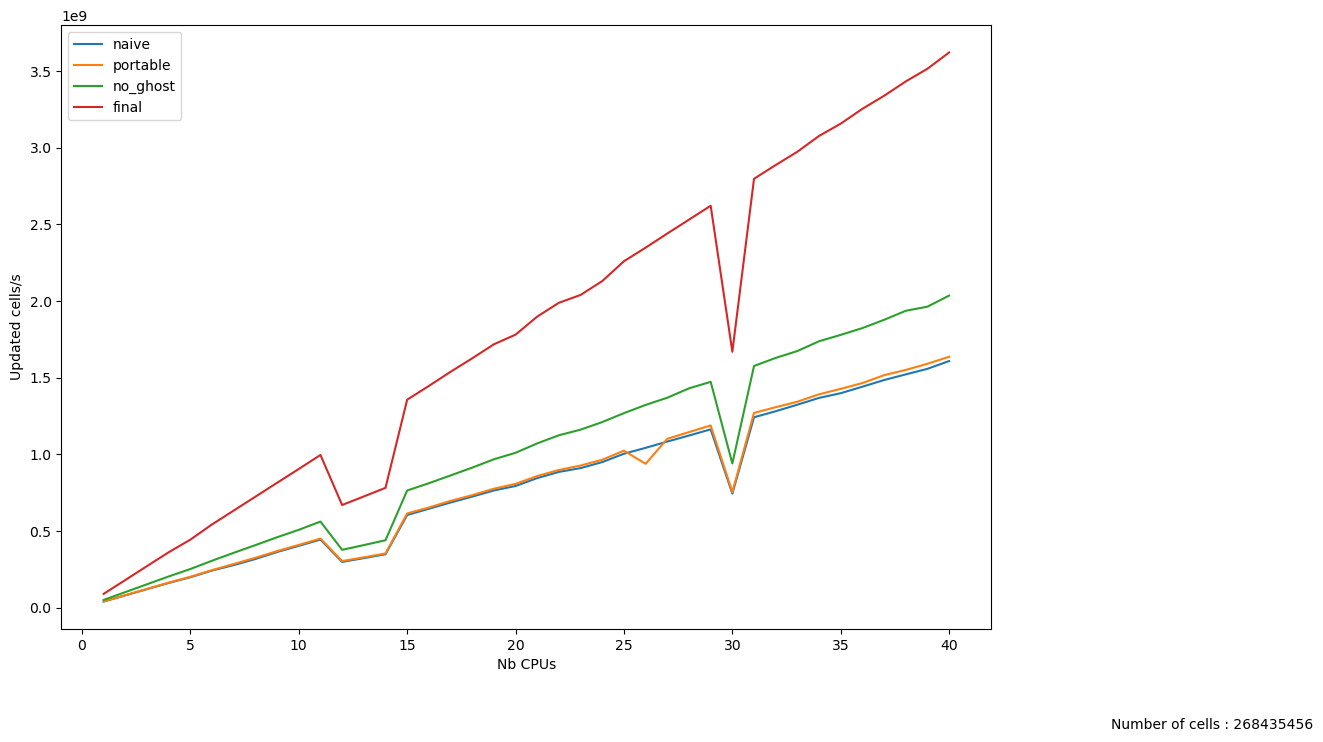

In [2]:
%matplotlib inline
   
plt.figure(figsize=(12,8), dpi=100)
plt.figtext(1.0, 0.0, "Number of cells : " + str(cpu_problem_size))
plt.xlabel("Nb CPUs")
plt.ylabel("Updated cells/s")   
   
for benchmark_name in cpu_curves : 
    x = []
    y = []
    for key in sorted(cpu_curves[benchmark_name].keys()) :
        x.append(key)
        y.append(cpu_curves[benchmark_name][key])
    plt.plot(x, y, label=benchmark_name)

plt.legend()
plt.show()

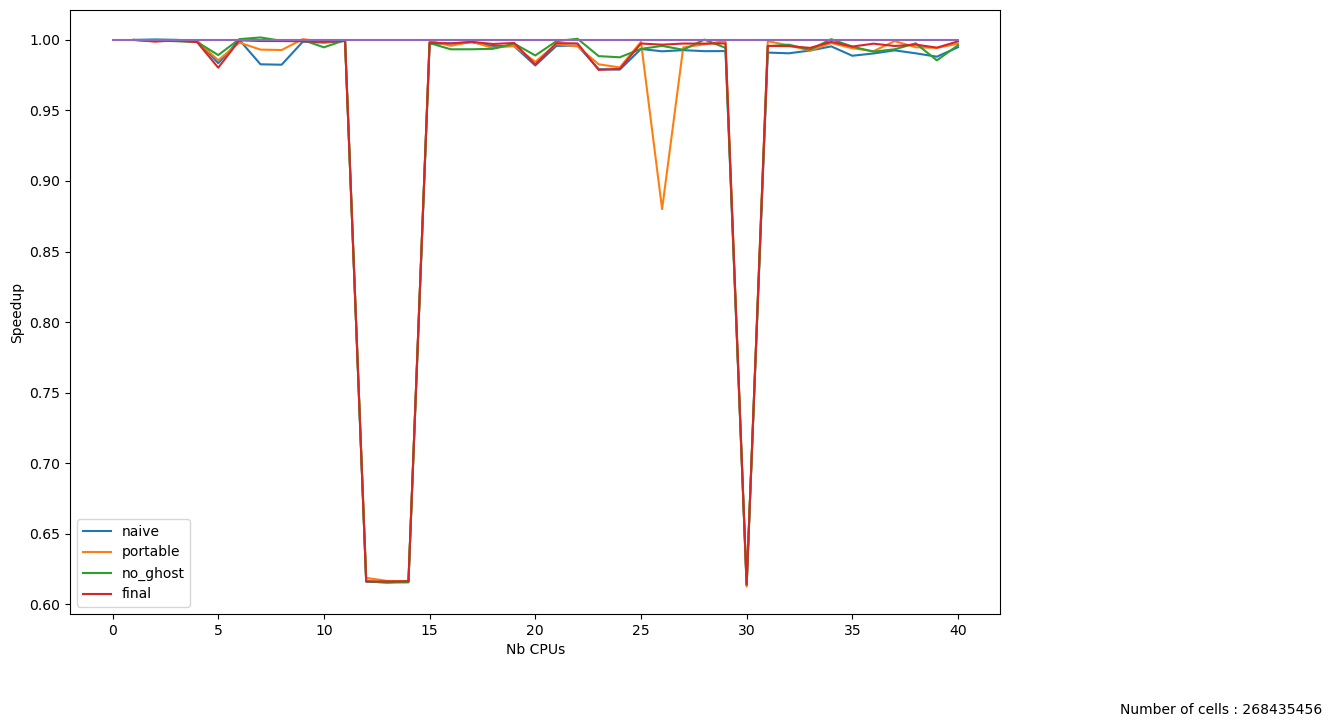

In [7]:
%matplotlib inline
   
plt.figure(figsize=(12,8), dpi=100)
plt.figtext(1.0, 0.0, "Number of cells : " + str(cpu_problem_size))
plt.xlabel("Nb CPUs")
plt.ylabel("Speedup")   
   
for benchmark_name in cpu_curves : 
    x = []
    y = []
    base_speedup = 0
    for key in sorted(cpu_curves[benchmark_name].keys()) :
        x.append(key)
        y.append(cpu_curves[benchmark_name][key]/base_speeds[benchmark_name]/key)
    plt.plot(x, y, label=benchmark_name)

linear = [1 for i in range(0,41)]
plt.plot([i for i in range(0,41)], linear)


plt.legend()
plt.show()

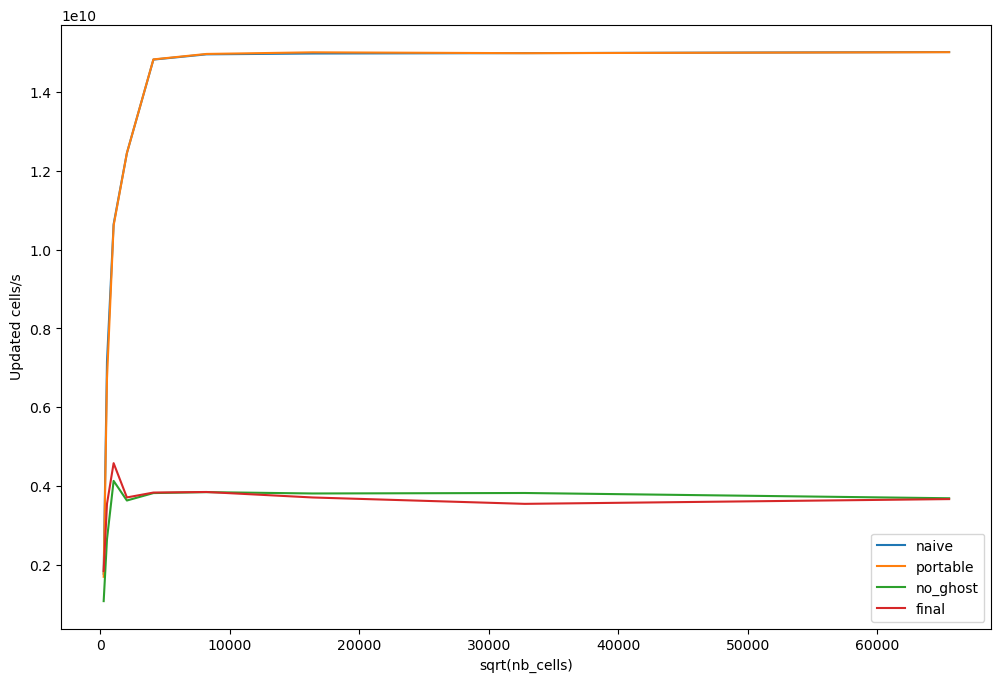

In [2]:
%matplotlib inline

plt.figure(figsize=(12,8), dpi=100)
plt.xlabel("sqrt(nb_cells)")
plt.ylabel("Updated cells/s")

for benchmark_name in gpu_curves : 
    x = []
    y = []
    for key in sorted(gpu_curves[benchmark_name].keys()) :
        x.append(key)
        y.append(gpu_curves[benchmark_name][key])
    plt.plot(x, y, label=benchmark_name)

plt.legend()
plt.show()